## Lib

In [76]:
import sys
import os
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

from utils.import_df import import_df
from utils.check_existing_file import check_file
from utils.img_preprocessing import get_features_target, img_preprocessing, generate_dataset

## Vars

In [78]:
csv_url = "../../storage/datas/csv/clean/cleaned_dataset_with_features_top_10_species.csv"
img_directory = "/home/guillaume/Téléchargements/mushroom-dataset/clean_dataset/"

## 1 - import DF

### Full Dataset

In [79]:
# Full Dataset
df = import_df(csv_url)

DF loaded with shape: (15200, 15)
Unique species in DF: 11


In [80]:
df["species"].value_counts()

species
Pleurotus ostreatus      1623
Trametes versicolor      1608
Pluteus cervinus         1470
other                    1400
Lepista nuda             1356
Psilocybe zapotecorum    1350
Psilocybe cyanescens     1310
Boletus edulis           1303
Hypholoma fasciculare    1293
Ganoderma applanatum     1281
Galerina marginata       1206
Name: count, dtype: int64

### Sample

In [81]:
# 10% Sample
df_sample_10 = import_df(csv_url,
                         sample = True,
                         sample_size = 0.1,
                         random_state=1)

DF sampled with 10.0% from original dataset, shape: (1520, 15)
Unique species in sampled DF: 11


In [82]:
df_sample_10["species"].value_counts()

species
Pleurotus ostreatus      169
Trametes versicolor      156
other                    145
Lepista nuda             142
Boletus edulis           136
Hypholoma fasciculare    135
Ganoderma applanatum     135
Pluteus cervinus         133
Psilocybe cyanescens     124
Psilocybe zapotecorum    123
Galerina marginata       122
Name: count, dtype: int64

## 2 - Check if all image files exist

In [83]:
check_file(img_directory = img_directory,
           df = df)

All files found!


In [84]:
check_file(img_directory = img_directory,
           df = df_sample_10)

All files found!


## 3 - Df column selection

In [85]:
target_column = "species"
img_link_column = "image_lien"

In [86]:
df = df[[target_column, img_link_column]]
df_sample_10 = df_sample_10[[target_column, img_link_column]]

In [87]:
df["image_lien"] = df["image_lien"].apply(lambda x: os.path.join(img_directory, x))
df_sample_10["image_lien"] = df_sample_10["image_lien"].apply(lambda x: os.path.join(img_directory, x))

## 4 - img Preprocessing

### Features & Targets

In [88]:
# Get features & target
df_features, df_target = get_features_target(df, target_column_name = "species")
df_sample_10_features, df_sample_10_target = get_features_target(df_sample_10, target_column_name = "species")

In [89]:
df_sample_10_features

,image_lien
0,/home/guillaume/Téléchargements/mushroom-datas...
1,/home/guillaume/Téléchargements/mushroom-datas...
2,/home/guillaume/Téléchargements/mushroom-datas...
3,/home/guillaume/Téléchargements/mushroom-datas...
4,/home/guillaume/Téléchargements/mushroom-datas...
...,...
1515,/home/guillaume/Téléchargements/mushroom-datas...
1516,/home/guillaume/Téléchargements/mushroom-datas...
1517,/home/guillaume/Téléchargements/mushroom-datas...
1518,/home/guillaume/Téléchargements/mushroom-datas...


### Img Load & Preprocessing

In [95]:
# Try random images pre-processing
n_random = 5
random_images = df_features["image_lien"].sample(n_random)

img_preprocessing_args = {
    "dimensions": (256,256),
    "resize": True,
    "augment": True,
    "normalize": False,
    "flip_left_right": True,
    "flip_up_down": True,
    "brightness": True,
    "contrast": True,
    "saturation": False,
}

In [96]:
import tensorflow as tf

def check_pixel_values(img: tf.Tensor):
    min_val = tf.reduce_min(img)
    max_val = tf.reduce_max(img)

    if min_val < 0 or max_val > 255:
        print(f"Image at {img} contains pixel values outside the range [0,255]. Min: {min_val}, Max: {max_val}")
    else:
        print(f"Image at {img} contains pixel values within the range [0,255].")


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image at [[[  1.0261841   13.977104     0.8706207 ]
  [ 20.959244    44.351276    30.295593  ]
  [ 51.808006    87.85594     72.21827   ]
  ...
  [ 20.959244    74.25085     42.318703  ]
  [ 20.959244    69.50488     44.691685  ]
  [ 32.66595     78.838615    56.872986  ]]

 [[ -9.296288     3.6546326   -7.4447174 ]
  [ 33.002125    57.254364    44.058887  ]
  [ 56.682503    93.59065     80.24686   ]
  ...
  [ 21.532715    75.54115     43.60901   ]
  [ 22.966385    72.94571     45.98199   ]
  [ 30.802174    79.268715    55.86942   ]]

 [[-11.698929     2.3198318   -7.237076  ]
  [ 40.78847     66.19754     55.894135  ]
  [ 58.388084    96.453064    85.482254  ]
  ...
  [ 18.922432    77.9438      42.40769   ]
  [ 21.839218    76.905624    46.782875  ]
  [ 26.604958    78.77929     52.161633  ]]

 ...

 [[  7.388748    47.51031      1.6418381 ]
  [ 71.79049    115.16995     55.55302   ]
  [ 91.763084   140.30873     60.12595   ]
  ...
  [ 85.0347      70.61722     72.85601   ]
  [ 46.00

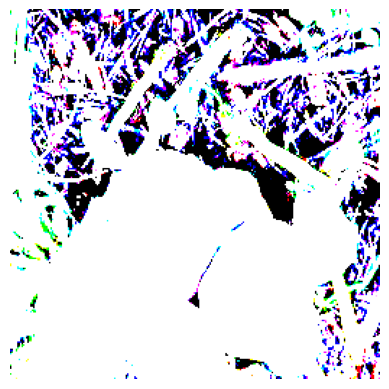

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image at [[[111.8266   140.84892   89.07752 ]
  [125.946686 154.00845  108.86486 ]
  [127.38751  154.00845  118.95064 ]
  ...
  [153.80264  161.4047   147.76715 ]
  [122.58476  130.18681  117.02954 ]
  [121.81632  129.41837  117.605865]]

 [[101.815865 130.83818   80.285484]
  [122.8129   150.87466  105.99222 ]
  [121.64223  147.82791  114.337   ]
  ...
  [150.32065  160.0119   141.0643  ]
  [136.0775   146.20398  129.04242 ]
  [109.368195 118.53714  102.63329 ]]

 [[101.26655  129.72154   81.888405]
  [121.35406  149.17268  106.6676  ]
  [115.45568  141.35321  108.7538  ]
  ...
  [129.69884  144.79318  116.381165]
  [120.85877  136.83862  109.53725 ]
  [106.9458   122.11218   95.4922  ]]

 ...

 [[ 75.0015    78.76135   76.55435 ]
  [ 59.842823  64.46716   63.31677 ]
  [ 54.69487   60.279762  60.570194]
  ...
  [ 83.34628   97.387024  74.51918 ]
  [ 68.57783   84.31453   58.790176]
  [ 87.50967  104.02082   77.631966]]

 [[ 91.219795  94.97964   92.772644]
  [ 65.61513   70.23947   69

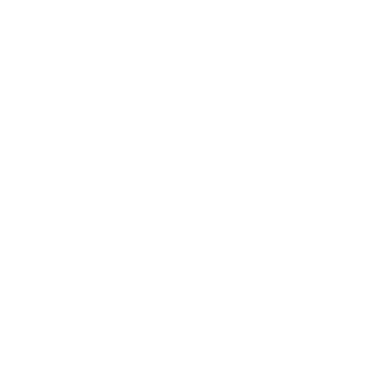

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image at [[[-16.357864  -15.140877  -12.568367 ]
  [-16.357864  -15.140877  -13.417854 ]
  [-16.357864  -13.017174  -12.709946 ]
  ...
  [170.81189   168.77252   161.85912  ]
  [138.95622   138.33266   133.54297  ]
  [111.63114   110.58283   107.49212  ]]

 [[-16.357864  -12.516106  -10.193573 ]
  [-16.357864  -15.140877  -14.6677475]
  [-15.107971  -13.017174  -12.709946 ]
  ...
  [146.314     145.77449   139.36105  ]
  [126.33231   125.33378   121.669    ]
  [113.38099   112.33269   109.24197  ]]

 [[-13.05394   -10.344841   -9.878334 ]
  [-15.788223  -14.001595  -14.833664 ]
  [-14.942062  -14.156456  -14.418877 ]
  ...
  [121.985344  121.075294  116.77893  ]
  [112.124466  111.07616   107.90248  ]
  [108.4865    107.438194  105.942474 ]]

 ...

 [[ 65.512314   79.1884     96.48532  ]
  [ 69.83053    83.50662   100.80353  ]
  [ 74.940704   88.6168    105.91371  ]
  ...
  [ 90.745766   95.36069   106.99437  ]
  [ 89.60648    94.929306  104.439285 ]
  [ 92.72126    98.46883   106.7045

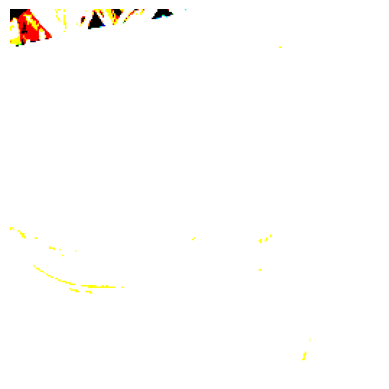

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image at [[[100.94167   78.2101    64.28552 ]
  [104.40517   84.19249   70.162964]
  [ 82.36478   65.30073   51.271202]
  ...
  [ 82.88955   65.40568   52.845516]
  [103.88039   85.87176   76.46022 ]
  [113.64113   95.63249   88.32004 ]]

 [[ 98.08823   75.35665   62.95392 ]
  [ 98.41293   78.20026   65.12188 ]
  [ 82.55501   65.49096   51.461433]
  ...
  [ 86.028336  68.54447   55.984303]
  [100.836716  82.82808   73.41654 ]
  [110.31212   92.30348   83.659424]]

 [[100.98103   79.40067   67.95237 ]
  [ 93.80807   73.15262   61.32385 ]
  [ 85.67412   68.16729   55.288982]
  ...
  [ 89.27536   72.32282   58.96566 ]
  [ 97.688095  81.09634   69.55948 ]
  [106.8683    90.27655   79.369415]]

 ...

 [[ 27.726276  15.595074  10.758884]
  [ 25.161457  13.659981  10.758884]
  [ 22.176823  12.774429  10.758884]
  ...
  [ 50.59317   34.78857   20.290035]
  [ 86.2612    68.88229   48.135696]
  [ 90.65288   72.64424   51.267925]]

 [[ 25.925655  13.794453  10.758884]
  [ 24.246387  12.744911  10

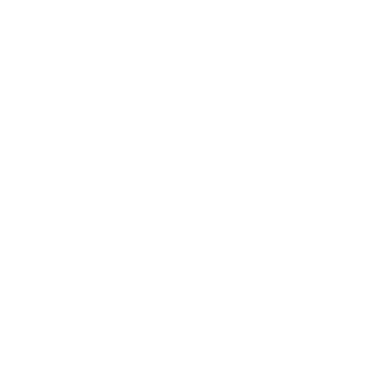

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image at [[[ 55.067463  55.127846  63.54511 ]
  [ 48.230423  48.290806  56.708076]
  [ 54.14709   54.207474  62.62474 ]
  ...
  [ 48.361904  52.629696  51.580296]
  [ 46.389683  49.34266   48.29326 ]
  [ 10.889671  13.053757  12.004356]]

 [[ 51.789154  51.849537  60.266808]
  [ 50.24784   50.308228  58.725494]
  [ 51.12096   51.181347  59.598614]
  ...
  [ 57.69247   61.960262  62.171745]
  [ 48.154922  50.477455  51.319386]
  [ 35.85524   37.893238  37.222103]]

 [[ 50.17902   50.239403  58.656673]
  [ 50.8241    51.986927  60.036713]
  [ 45.356834  48.35706   55.79438 ]
  ...
  [ 39.227535  43.495327  45.72064 ]
  [ 38.553436  40.849003  43.731724]
  [ 38.515427  39.69058   41.852974]]

 ...

 [[130.13005  131.24228  125.98547 ]
  [128.77698  129.8892   124.6324  ]
  [119.25868  120.37092  115.11411 ]
  ...
  [101.08137  100.52928   93.954315]
  [ 89.92213   89.37004   82.79508 ]
  [ 91.881     91.818886  83.774   ]]

 [[122.23037  123.29947  118.17208 ]
  [123.60528  124.67437  119

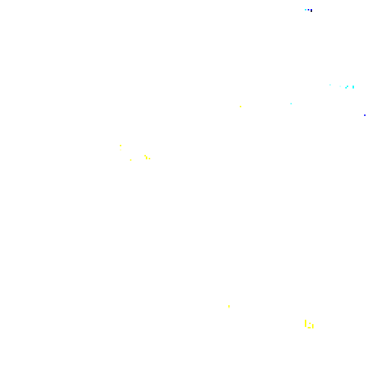

In [97]:
for elt in random_images:
    img = img_preprocessing(elt, **img_preprocessing_args)
    check_pixel_values(img)
    plt.imshow(img)
    plt.axis("off")
    plt.show()

### Tensorflow dataset generation

In [ ]:
# Construction des datasets
from fonctions_dataset import gen_dataset, load_image
dataset_train = gen_dataset(set = 'train', training_data = training_data, img_dim = img_dim, augment = True, normalize = False, batch_size = batch_size)
dataset_val = gen_dataset(set = 'validation', training_data = training_data, img_dim = img_dim, augment = False, normalize = False, batch_size = batch_size)
dataset_test = gen_dataset(set = 'test', training_data = training_data, img_dim = img_dim, augment = False, normalize = False, batch_size = batch_size)

In [ ]:
generate_dataset() # Terminer fonction et tester